<a href="https://colab.research.google.com/github/rafael2673/AEDII/blob/main/U2T3/trab_7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
start = 0
edges = [
    [[1, 7]],
    [[2, 6], [3, 20], [4, 3]],
    [[3, 14]],
    [[4, 2]],
    [],
    [],
]

In [ ]:
[0, 7, 13, 27, 10, -1]

[0, 7, 13, 27, 10, -1]

In [16]:
class MinHeap:
    def __init__(self, array):
        self.vertexMap = {idx: idx for idx in range(len(array))}
        self.heap = self.buildHeap(array)

    def isEmpty(self):
        return len(self.heap) == 0

    def buildHeap(self, array):
        firstParentIdx = (len(array) - 2) // 2
        for currentIdx in reversed(range(firstParentIdx + 1)):
            self.siftDown(currentIdx, len(array) - 1, array)
        return array

    def siftDown(self, currentIdx, endIdx, heap):
        childOneIdx = currentIdx * 2 + 1
        while childOneIdx <= endIdx:
            childTwoIdx = currentIdx * 2 + 2 if currentIdx * 2 + 2 <= endIdx else -1
            if childTwoIdx != -1 and heap[childTwoIdx][1] < heap[childOneIdx][1]:
                idxToSwap = childTwoIdx
            else:
                idxToSwap = childOneIdx

            if heap[idxToSwap][1] < heap[currentIdx][1]:
                self.swap(currentIdx, idxToSwap, heap)
                currentIdx = idxToSwap
                childOneIdx = currentIdx * 2 + 1
            else:
                return

    def siftUp(self, currentIdx, heap):
        parentIdx = (currentIdx - 1) // 2
        while currentIdx > 0 and heap[currentIdx][1] < heap[parentIdx][1]:
            self.swap(currentIdx, parentIdx, heap)
            currentIdx = parentIdx
            parentIdx = (currentIdx - 1) // 2

    def remove(self):
        if self.isEmpty():
            return None
        self.swap(0, len(self.heap) - 1, self.heap)
        vertex, distance = self.heap.pop()
        self.vertexMap.pop(vertex)
        self.siftDown(0, len(self.heap) - 1, self.heap)
        return vertex, distance

    def swap(self, i, j, heap):
        self.vertexMap[heap[i][0]] = j
        self.vertexMap[heap[j][0]] = i
        heap[i], heap[j] = heap[j], heap[i]

    def update(self, vertex, value):
        self.heap[self.vertexMap[vertex]] = (vertex, value)
        self.siftUp(self.vertexMap[vertex], self.heap)

In [17]:
# O((v + e) * log(v)) time | O(v) space — where v is the number
# of vertices and e is the number of edges in the input graph
def dijkstrasAlgorithm(start, edges):
    """
    Implements Dijkstra's algorithm to find the shortest paths from a starting vertex to all other vertices
    in a weighted graph. The graph is represented using an adjacency list.

    Args:
        start (int): The starting vertex index.
        edges (list of list): An adjacency list where each index represents a vertex, and each entry
                              is a list of [destination, weight] pairs.

    Returns:
        list: A list of minimum distances from the starting vertex to each vertex in the graph.
              If a vertex is unreachable, its distance is represented as -1.
    """
    # Step 1: Initialize the number of vertices in the graph
    numberOfVertices = len(edges)

    # Step 2: Initialize the minimum distances with infinity
    # Set the starting vertex's distance to 0
    minDistances = [float("inf") for _ in range(numberOfVertices)]
    minDistances[start] = 0

    # Step 3: Initialize the MinHeap to track the vertices and their current shortest distances
    minDistancesHeap = MinHeap([(idx, float("inf")) for idx in range(numberOfVertices)])
    minDistancesHeap.update(start, 0)  # Update the starting vertex's distance to 0

    # Step 4: Process vertices until the heap is empty
    while not minDistancesHeap.isEmpty():
        # Extract the vertex with the smallest known distance
        vertex, currentMinDistance = minDistancesHeap.remove()

        # If the current distance is infinity, no further reachable vertices exist
        if currentMinDistance == float("inf"):
            break

        # Step 5: Relaxation - Update distances for all neighboring vertices
        for edge in edges[vertex]:
            destination, distanceToDestination = edge  # Extract neighbor and weight

            # Calculate the new potential path distance
            newPathDistance = currentMinDistance + distanceToDestination
            currentDestinationDistance = minDistances[destination]

            # If the new path is shorter, update the distance and the heap
            if newPathDistance < currentDestinationDistance:
                minDistances[destination] = newPathDistance
                minDistancesHeap.update(destination, newPathDistance)

    # Step 6: Convert unreachable vertices' distances from infinity to -1
    return list(map(lambda x: -1 if x == float("inf") else x, minDistances))

In [ ]:
def test_dijkstras_algorithm():
    """
    Test function for Dijkstra's algorithm.

    This test evaluates the correctness of the `dijkstrasAlgorithm` function using a predefined input graph
    and expected output. The graph is represented as an adjacency list, and the test ensures that the
    algorithm computes the shortest paths correctly.

    Input Graph:
        Node 0 -> Node 1 (weight 7)
        Node 1 -> Node 2 (weight 6), Node 3 (weight 20), Node 4 (weight 3)
        Node 2 -> Node 3 (weight 14)
        Node 3 -> Node 4 (weight 2)
        Node 4 -> No outgoing edges
        Node 5 -> No outgoing edges

    Expected Output:
        [0, 7, 13, 27, 10, -1]
        - Shortest distances from node 0 to all other nodes.
        - `-1` represents unreachable nodes (node 5 in this case).

    Assertions:
        The test checks if the result matches the expected output and raises an assertion error otherwise.

    Returns:
        None. Prints "Test passed" if the output is correct.
    """
    # Input graph represented as an adjacency list
    edges = [
        [[1, 7]],                   # Node 0 -> Node 1 (weight 7)
        [[2, 6], [3, 20], [4, 3]],  # Node 1 -> Node 2 (6), Node 3 (20), Node 4 (3)
        [[3, 14]],                  # Node 2 -> Node 3 (weight 14)
        [[4, 2]],                   # Node 3 -> Node 4 (weight 2)
        [],                         # Node 4 has no outgoing edges
        []                          # Node 5 has no outgoing edges
    ]
    start = 0  # Starting node for Dijkstra's algorithm

    # Expected output: Shortest distances from the starting node
    expected_output = [0, 7, 13, 27, 10, -1]

    # Step 1: Run Dijkstra's algorithm on the input graph
    result = dijkstrasAlgorithm(start, edges)

    # Step 2: Compare the result with the expected output
    assert result == expected_output, f"Test failed: expected {expected_output}, but got {result}"

    # Step 3: If no assertion error, print test success message
    print("Test passed: Output matches expected result.")


# Run the test function
test_dijkstras_algorithm()

Test passed: Output matches expected result.


In [27]:
def dijkstrasAlgorithmWithPaths(start, edges):
    """
    Implements Dijkstra's algorithm to compute the shortest paths from a starting vertex to all other vertices
    in a weighted graph. It also tracks the predecessors of each vertex for path reconstruction.

    Args:
        start (int): The index of the starting vertex.
        edges (list of list): Adjacency list representation of the graph, where each index represents a vertex,
                              and each entry is a list of [destination, weight] pairs.

    Returns:
        tuple: A tuple containing:
            - minDistances (list): A list of the shortest distances from the starting vertex to each vertex.
                                   Vertices that are unreachable will have a distance of `float("inf")`.
            - previousNodes (list): A list where each index points to the predecessor of the vertex
                                    in the shortest path. If no path exists, the predecessor is `None`.

    Algorithm Steps:
        1. Initialize distances with `infinity` and set the starting vertex distance to 0.
        2. Use a MinHeap to manage and efficiently retrieve the vertex with the smallest known distance.
        3. For each vertex, relax its edges to update distances to neighboring vertices.
        4. Track the predecessor of each vertex to allow path reconstruction later.
        5. Return the minimum distances and the list of predecessors.
    """

    # Obter todos os vértices únicos da lista de arestas
    all_vertices = set()
    for u in range(len(edges)):
        all_vertices.add(u)  # Adicione o vértice de origem
        for v, _ in edges[u]:
            all_vertices.add(v)  # Adicione o vértice de destino

    # Inicializar o MinHeap com todos os vértices únicos
    heap = MinHeap([(vertex, float("inf")) for vertex in all_vertices])
    heap.update(start, 0)

    numberOfVertices = len(edges)
    minDistances = [float("inf")] * numberOfVertices
    minDistances[start] = 0
    previousNodes = [None] * numberOfVertices

    # Dicionário para rastrear vértices que já foram removidos do MinHeap
    removed_vertices = set()

    while not heap.isEmpty():
        vertex, currentMinDistance = heap.remove()

        # Verificar se o vértice já foi removido
        if vertex in removed_vertices:
            continue

        # Marcar o vértice como removido
        removed_vertices.add(vertex)

        # Verificar se o índice do vértice é válido
        if vertex < len(minDistances):
            minDistances[vertex] = currentMinDistance
            # Verificar se o vértice tem vizinhos
            if vertex < len(edges) and edges[vertex]:
                # Relaxamento das arestas
                for edge in edges[vertex]:
                    destination, weight = edge
                    newPathDistance = currentMinDistance + weight

                    # Verificar se o índice do destino é válido
                    if destination < len(minDistances) and newPathDistance < minDistances[destination]:
                        minDistances[destination] = newPathDistance
                        previousNodes[destination] = vertex
                        if destination in heap.vertexMap:
                            heap.update(destination, newPathDistance)

    return minDistances, previousNodes

In [ ]:
def reconstructPath(previousNodes, start, end):
    """
    Reconstructs the shortest path from the start node to the end node using the predecessor list.

    Args:
        previousNodes (list): A list where each index corresponds to a node, and the value at that index
                              is the predecessor node in the shortest path. `None` indicates no predecessor.
        start (int): The starting node index.
        end (int): The destination node index.

    Returns:
        list: A list of nodes representing the shortest path from the start node to the end node.
              If no path exists, returns an empty list.

    Algorithm:
        1. Start from the destination node (`end`) and trace back to the start node (`start`) using
           the `previousNodes` list.
        2. Append each node encountered to the `path` list.
        3. Reverse the `path` list to produce the correct order from start to end.
        4. If no valid path exists (e.g., disconnected graph), return an empty list.

    Example:
        previousNodes = [None, 0, 1, 2]  # Predecessor list
        start = 0
        end = 3
        reconstructPath(previousNodes, start, end) -> [0, 1, 2, 3]
    """
    path = []  # Initialize an empty list to store the path
    currentNode = end  # Start tracing from the destination node

    # Step 1: Trace back from the destination node to the start node
    while currentNode is not None and currentNode != start:
        path.append(currentNode)  # Add the current node to the path
        currentNode = previousNodes[currentNode]  # Move to the predecessor node

    # Step 2: Add the start node if a valid path was found
    if currentNode == start:
        path.append(start)  # Add the start node to the path
        path.reverse()  # Reverse the path to get the correct order from start to end
        return path

    # Step 3: If no path exists, return an empty list
    return []

In [ ]:
def test_dijkstrasAlgorithmWithPaths():
    """
    Test function for the `dijkstrasAlgorithmWithPaths` function.

    This test verifies:
        1. The correctness of the minimum distances calculated by Dijkstra's algorithm.
        2. The correctness of the reconstructed paths using the `reconstructPath` function.

    Input Graph (Adjacency List):
        - Node 0 -> Node 1 (weight 7)
        - Node 1 -> Node 2 (weight 6), Node 3 (weight 20), Node 4 (weight 3)
        - Node 2 -> Node 3 (weight 14)
        - Node 3 -> Node 4 (weight 2)
        - Node 4 has no outgoing edges
        - Node 5 is isolated (no incoming or outgoing edges).

    Expected Results:
        - Minimum Distances:
            [0, 7, 13, 27, 10, float("inf")]
            - Distances from node 0 to all other nodes. `float("inf")` represents unreachable nodes.
        - Reconstructed Paths:
            - Path to node 3: [0, 1, 2, 3]
            - Path to node 4: [0, 1, 4]
            - Path to node 5: []

    Assertions:
        The test uses assertions to ensure that the computed distances and paths match the expected values.

    Returns:
        None. Prints "All tests passed!" if the results are correct.
    """
    # Step 1: Define the input graph as an adjacency list
    edges = [
        [[1, 7]],                   # Node 0 -> Node 1 (weight 7)
        [[2, 6], [3, 20], [4, 3]],  # Node 1 -> Node 2 (6), Node 3 (20), Node 4 (3)
        [[3, 14]],                  # Node 2 -> Node 3 (weight 14)
        [[4, 2]],                   # Node 3 -> Node 4 (weight 2)
        [],                         # Node 4 has no outgoing edges
        []                          # Node 5 has no outgoing edges
    ]
    start = 0  # Starting node for Dijkstra's algorithm

    # Step 2: Run Dijkstra's algorithm
    minDistances, previousNodes = dijkstrasAlgorithmWithPaths(start, edges)

    # Step 3: Check the minimum distances
    expectedDistances = [0, 7, 13, 27, 10, float("inf")]
    assert minDistances == expectedDistances, f"Distances test failed: {minDistances}"

    # Step 4: Reconstruct paths to specific nodes and validate them
    # Path to node 3
    path_to_3 = reconstructPath(previousNodes, start, 3)
    expectedPathTo3 = [0, 1, 2, 3]
    assert path_to_3 == expectedPathTo3, f"Path to 3 test failed: {path_to_3}"

    # Path to node 4
    path_to_4 = reconstructPath(previousNodes, start, 4)
    expectedPathTo4 = [0, 1, 4]
    assert path_to_4 == expectedPathTo4, f"Path to 4 test failed: {path_to_4}"

    # Path to node 5 (unreachable)
    path_to_5 = reconstructPath(previousNodes, start, 5)
    expectedPathTo5 = []
    assert path_to_5 == expectedPathTo5, f"Path to 5 test failed: {path_to_5}"

    # Step 5: Print success message if all tests pass
    print("All tests passed!")


# Run the test
test_dijkstrasAlgorithmWithPaths()

All tests passed!


In [ ]:
!pip install networkx osmnx

Comprimento total do caminho com NetworkX: 100.60 km
Tempo de execução para NetworkX: 1.7882 segundos
Comprimento total do caminho com Dijkstra customizado: 100.60 km
Tempo de execução para Dijkstra customizado: 2.9891 segundos


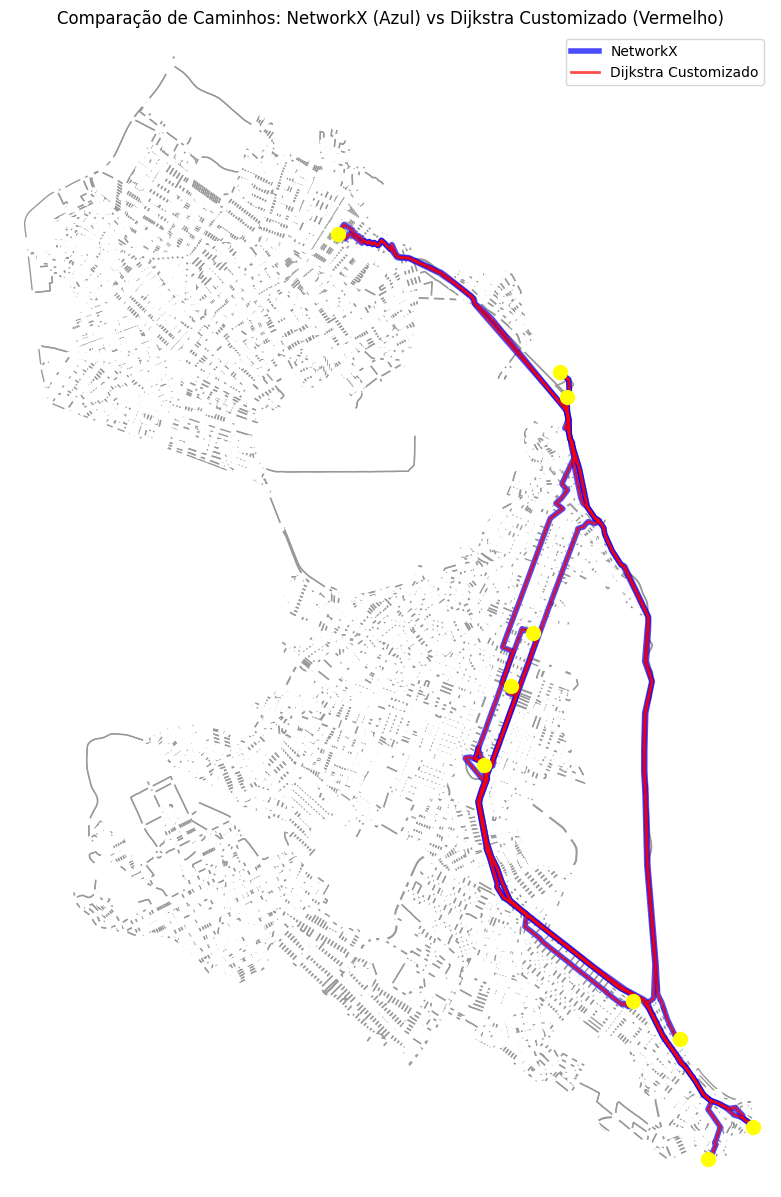

In [46]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import time

# Lista de pontos de interesse em Natal-RN
pois = [
    "Ponta Negra, Natal, Brazil",
    "Praia do Forte, Natal, Brazil",
    "Morro do Careca, Natal, Brazil",
    "Arena das Dunas, Natal, Brazil",
    "Parque das Dunas, Natal, Brazil",
    "Forte dos Reis Magos, Natal, Brazil",
    "Shopping Midway Mall, Natal, Brazil",
    "Praia de Genipabu, Natal, Brazil",
    "Museu Câmara Cascudo, Natal, Brazil",
    "Barreira do Inferno, Natal, Brazil"
]

# Obter coordenadas dos pontos de interesse
poi_coords = [ox.geocode(poi) for poi in pois]

# Obter o grafo de Natal-RN
grafo = ox.graph_from_place('Natal, Brazil', network_type='drive')

# Converter coordenadas para nós do grafo
poi_nodes = [ox.distance.nearest_nodes(grafo, X=coord[1], Y=coord[0]) for coord in poi_coords]

# Verificar se todos os pontos de interesse foram mapeados corretamente
for i, node in enumerate(poi_nodes):
    if node not in grafo.nodes:
        print(f"POI {pois[i]} não foi mapeado corretamente para um nó no grafo.")

# Criar a lista de adjacência
node_to_index = {node: idx for idx, node in enumerate(grafo.nodes)}
edges = [[] for _ in range(len(node_to_index))]
for u, v, data in grafo.edges(data=True):
    if u in node_to_index and v in node_to_index:
        edges[node_to_index[u]].append((node_to_index[v], data['length']))

# Verificar mapeamento completo e presença dos nós de interesse
for node in poi_nodes:
    if node not in node_to_index:
        print(f"Nó de interesse {node} não está presente em node_to_index.")

# Medir tempo de execução para NetworkX
start_time_networkx = time.time()
total_length_networkx = 0
paths_networkx = []
for i in range(len(poi_nodes) - 1):
    try:
        path = nx.shortest_path(grafo, poi_nodes[i], poi_nodes[i+1], weight='length')
        length = nx.shortest_path_length(grafo, poi_nodes[i], poi_nodes[i+1], weight='length')
        total_length_networkx += length
        paths_networkx.append(path)
    except nx.NetworkXNoPath:
        pass
end_time_networkx = time.time()
time_taken_networkx = end_time_networkx - start_time_networkx

# Medir tempo de execução para algoritmo de Dijkstra customizado
start_time_custom = time.time()
total_length_custom = 0
paths_custom = []
for i in range(len(poi_nodes) - 1):
    if poi_nodes[i] not in node_to_index or poi_nodes[i+1] not in node_to_index:
        continue

    min_distances, previousNodes = dijkstrasAlgorithmWithPaths(node_to_index[poi_nodes[i]], edges)
    length = min_distances[node_to_index[poi_nodes[i+1]]]
    total_length_custom += length

    # Caminho direto a partir dos min_distances e previousNodes
    current = node_to_index[poi_nodes[i+1]]
    path_custom = []
    while current is not None:
        path_custom.append(current)
        current = previousNodes[current]
    paths_custom.append([list(node_to_index.keys())[node] for node in path_custom[::-1]])  # Reverter o caminho
end_time_custom = time.time()
time_taken_custom = end_time_custom - start_time_custom

# Mostrar comprimentos totais dos caminhos em quilômetros e tempos de execução
print(f"Comprimento total do caminho com NetworkX: {total_length_networkx / 1000:.2f} km")
print(f"Tempo de execução para NetworkX: {time_taken_networkx:.4f} segundos")
print(f"Comprimento total do caminho com Dijkstra customizado: {total_length_custom / 1000:.2f} km")
print(f"Tempo de execução para Dijkstra customizado: {time_taken_custom:.4f} segundos")

# Plotar os caminhos no mesmo mapa com cores diferentes e fundo preto
fig, ax = plt.subplots(figsize=(15, 15))

# Plotar o grafo
ox.plot_graph(grafo, ax=ax, bgcolor='black', show=False, close=False)

# Plotar caminhos NetworkX
for path in paths_networkx:
    route_nodes = [(grafo.nodes[node]['x'], grafo.nodes[node]['y']) for node in path]
    xs, ys = zip(*route_nodes)
    ax.plot(xs, ys, color='blue', linewidth=4, alpha=0.7, label='NetworkX')

# Plotar caminhos Dijkstra customizado
for path in paths_custom:
    route_nodes = [(grafo.nodes[node]['x'], grafo.nodes[node]['y']) for node in path]
    xs, ys = zip(*route_nodes)
    ax.plot(xs, ys, color='red', linewidth=2, alpha=0.7, label='Dijkstra Customizado')

# Marcar pontos de interesse
for poi_node in poi_nodes:
    x, y = grafo.nodes[poi_node]['x'], grafo.nodes[poi_node]['y']
    ax.scatter(x, y, c='yellow', s=100, zorder=5)  # Marcar pontos de interesse em amarelo

# Adicionar legenda
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

plt.title('Comparação de Caminhos: NetworkX (Azul) vs Dijkstra Customizado (Vermelho)')
plt.show()